# NFHS Data Mining: Menstrual Products and Birth-Related Issues

Group 2 Presents an evaluation of how the usage of different menstrual products could result in birth-related issues or pregnancy complications by studying the NFHS data set, IABR, specifically the attributes, giving insight into menstrual products used, complications in abortion (or month when pregnancy ended), size of child at birth and smoking-related habits. We tried to understand this in relation to relevant literature surrounding the 


*Problem Statement*: finding the degree of impact of menstrual products on birth and complications related to birth


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt

In [ ]:
data2015 = pd.read_csv('/content/IABR2015-16.csv', low_memory=False)

# Data Cleaning and Preprocessing

Firstly, features related to period products used, smoking habits, birth weight, birth size, urban/rural setting, first period age, pregnancy termination, and complication in pregnancy are extracted.

Then, this data is cleaned by eliminating the samples where the person smokes, and empty cells are either filled or removed depending on how many missing values there are.

The preprocessing techniques employed are: **data cleaning and smoothing, feature subset selection, aggregation,** and **entropy-based discretization**.

In [ ]:
# feature subset selection
data = data2015[['S257A','S257B','S257C','S257D','S257E','S257X','V229','S240','M18','M19','V025','V024','V026','S256','V463A','V463B','V463C','V463D','V463E','V463F','V463G']]

In [ ]:
# removing rows where data related to menstrual products is not available
data['S257A'].replace(' ', np.nan, inplace=True) 
data.dropna(subset = ['S257A'] , inplace = True)

Below, we are aggregating the features of drug consumption as it is a known fact that they affect birth, and depending on what the new 'SMOKE' feature value is, we remove the entire sample is smoking corresponds to a positive value.

In [4]:
# converting smoke features to numeric data
data['V463A'] = pd.to_numeric(data['V463A'])
data['V463B'] = pd.to_numeric(data['V463B'])
data['V463C'] = pd.to_numeric(data['V463C'])
data['V463D'] = pd.to_numeric(data['V463D'])
data['V463E'] = pd.to_numeric(data['V463E'])
data['V463F'] = pd.to_numeric(data['V463F'])
data['V463G'] = pd.to_numeric(data['V463G'])

# aggregation of smoke features, removing the smoke positive data
data['SMOKE']=data['V463A']+data['V463B']+data['V463C']+data['V463D']+data['V463E']+data['V463F']+data['V463G']
data = data[data['SMOKE'] == 0]
data = data.drop(['SMOKE','V463A','V463B','V463C','V463D','V463E','V463F','V463G','V026'],axis=1)

# dataframe saved as a CSV file for further processing
data.to_csv('remove_smoke.csv')

Now, we are smoothing out the data by filling in the missing values with the median.

In [5]:
# filling missing values in the birth weights with the global median
data['M19'].replace([' ','9996','9998','9999'], np.nan, inplace=True)
data['M19'] = pd.to_numeric(data['M19'])
data['M19'] = data['M19'].fillna(data['M19'].median())

# filling missing values in the birth sizes with the global median
data['M18'].replace([' ',8,9], np.nan, inplace=True)
data['M18'] = pd.to_numeric(data['M18'])
data['M18'] = data['M18'].fillna(data['M18'].median())

# filling missing values in the age at first period with the global median
data['S256'].replace(' ', np.nan, inplace=True)
data['S256'] = pd.to_numeric(data['S256'])
data['S256'] = data['S256'].fillna(data['S256'].median())

In [6]:
# cleaning pregnancy termination data
data['V229'].replace(' ', np.nan, inplace=True)
data.dropna(subset = ['V229'] , inplace = True)
data['V229'] = pd.to_numeric(data['V229'])
data.to_csv('terminated_preg.csv') # saved as a CSV for data exploration

# cleaning abortion complication data
data['S240'].replace(' ', np.nan, inplace=True)
data.dropna(subset = ['S240'] , inplace = True)
data['S240'] = pd.to_numeric(data['S240'])
data.to_csv('abortion_complication.csv') # saved as a CSV for data exploration

### Entropy-based Discretization



In [7]:
def entropy(pos,neg):
  total = pos + neg
  pos_part = pos/total
  neg_part = neg/total
  if (pos == 0 or neg ==0):
    return 0
  else:
    a = math.prod([pos_part,math.log2(pos_part)])
    b = math.prod([neg_part,math.log2(neg_part)])
    return (-1*(a+b))

In [12]:
data = pd.read_csv('/content/abortion_complication.csv')

We make different bins with combinations of birth size, and whether or not there was a complication in the abortion of the later pregnancy.

In [13]:
# Split 1: {1,5},{2,4},{3}

# making bin 1
bin1_1_0= data.apply(lambda x : True if ((x['M18']==1 or x['M18']==5) and x['S240']==0) else False, axis = 1)
bin1_1_0_total = len(bin1_1_0[bin1_1_0 == True].index)
bin1_1_1= data.apply(lambda x : True if ((x['M18']==1 or x['M18']==5) and x['S240']==1) else False, axis = 1)
bin1_1_1_total = len(bin1_1_1[bin1_1_1 == True].index)
bin1_1total = bin1_1_0_total + bin1_1_1_total
# calculating entropy of bin 1
entropy1_1 = entropy(bin1_1_0_total,bin1_1_1_total)

# making bin 2
bin1_2_0= data.apply(lambda x : True if ((x['M18'] == 2 or x['M18']==4) and x['S240']==0) else False, axis = 1)
bin1_2_0_total = len(bin1_2_0[bin1_2_0 == True].index)
bin1_2_1= data.apply(lambda x : True if ((x['M18'] == 2 or x['M18']==4) and x['S240']==1) else False, axis = 1)
bin1_2_1_total = len(bin1_2_1[bin1_2_1 == True].index)
bin1_2total = bin1_2_0_total + bin1_2_1_total
# calculating entropy of bin 2
entropy1_2 = entropy(bin1_2_0_total,bin1_2_1_total)

# making bin 3
bin1_3_0= data.apply(lambda x : True if (x['M18'] == 3 and x['S240']==0) else False, axis = 1)
bin1_3_0_total = len(bin1_3_0[bin1_3_0 == True].index)
bin1_3_1= data.apply(lambda x : True if (x['M18'] == 3 and x['S240']==1) else False, axis = 1)
bin1_3_1_total = len(bin1_3_1[bin1_3_1 == True].index)
bin1_3total = bin1_3_0_total + bin1_3_1_total
# calculating entropy of bin 3
entropy1_3 = entropy(bin1_3_0_total,bin1_3_1_total)

# calculating total entropy of split 1
total = bin1_1total + bin1_2total + bin1_3total
total_entropy1 = (bin1_1total*entropy1_1 + bin1_2total*entropy1_2 + bin1_3total*entropy1_3)/total

print('Split 1 BIN TABLE:')
print(bin1_1_0_total, bin1_1_1_total, bin1_1total)
print(bin1_2_0_total, bin1_2_1_total, bin1_2total)
print(bin1_3_0_total, bin1_3_1_total, bin1_3total)
print('Total Entropy:',total_entropy1)

Split 1 BIN TABLE:
13 0 13
31 2 33
86 11 97
Total Entropy: 0.42212551957759814


In [14]:
# Split 2: {1,2},{4,5},{3}

# making bin 1
bin2_1_0= data.apply(lambda x : True if ((x['M18']==1 or x['M18']==2) and x['S240']==0) else False, axis = 1)
bin2_1_0_total = len(bin2_1_0[bin2_1_0 == True].index)
bin2_1_1= data.apply(lambda x : True if ((x['M18']==1 or x['M18']==2) and x['S240']==1) else False, axis = 1)
bin2_1_1_total = len(bin2_1_1[bin2_1_1 == True].index)
bin2_1total = bin2_1_0_total + bin2_1_1_total
# calculating entropy of bin 1
entropy2_1 = entropy(bin2_1_0_total,bin2_1_1_total)

# making bin 2
bin2_2_0= data.apply(lambda x : True if ((x['M18'] == 4 or x['M18']==5) and x['S240']==0) else False, axis = 1)
bin2_2_0_total = len(bin2_2_0[bin2_2_0 == True].index)
bin2_2_1= data.apply(lambda x : True if ((x['M18'] == 2 or x['M18']==4) and x['S240']==1) else False, axis = 1)
bin2_2_1_total = len(bin2_2_1[bin1_2_1 == True].index)
bin2_2total = bin1_2_0_total + bin1_2_1_total
# calculating entropy of bin 2
entropy2_2 = entropy(bin2_2_0_total,bin2_2_1_total)

# making bin 3
bin2_3_0= data.apply(lambda x : True if (x['M18'] == 3 and x['S240']==0) else False, axis = 1)
bin2_3_0_total = len(bin2_3_0[bin2_3_0 == True].index)
bin2_3_1= data.apply(lambda x : True if (x['M18'] == 3 and x['S240']==1) else False, axis = 1)
bin2_3_1_total = len(bin1_3_1[bin1_3_1 == True].index)
bin2_3total = bin2_3_0_total + bin2_3_1_total
# calculating entropy of bin 3
entropy2_3 = entropy(bin2_3_0_total,bin2_3_1_total)

# calculating total entropy of split 2
total = bin2_1total + bin2_2total + bin2_3total
total_entropy2 = (bin2_1total*entropy2_1 + bin2_2total*entropy2_2 + bin2_3total*entropy2_3)/total

print('Split 2 BIN TABLE:')
print(bin2_1_0_total, bin2_1_1_total, bin2_1total)
print(bin1_2_0_total, bin2_2_1_total, bin1_2total)
print(bin2_3_0_total, bin2_3_1_total, bin2_3total)
print('Total Entropy:',total_entropy2)

Split 2 BIN TABLE:
25 2 27
31 2 33
86 11 97
Total Entropy: 0.47603328656035293


From the above Shannon Information analysis, it is evident that Split 1 contains more meaningful information.

# Data Visualization

The menstrual products used are represnted by the following numbers:

1. Cloth
2. Local prep
3. Sanitary napkin
4. Tampon
5. Nothing
6. Other


### Birth Weights and Sizes

In [17]:
plotdata = pd.read_csv('/content/remove_smoke.csv')
plotdata = plotdata.reset_index(drop=True)

# using data without smoke for birth weight and birh size versus the period product used

Plot of the product used and the corresponding birth weights in the data

<Axes: >

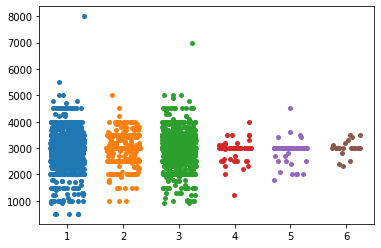

In [19]:
data1 = plotdata
df1 = pd.DataFrame(data1)

## creating a values array which will store either 0 or the weight of the child, if the value of S257A is 1
y_values = []
for i in range(len(df1['S257A'])):
    y_values.append(df1['S257A'][i] * df1['M19'][i])
## creating another array of same size
x_values = range(len(y_values))
## store all the non zero values in y, because for these non zero values S257A will have value 1
y_nonzero = [y for y in y_values if y != 0]
## store 1 in x for all these values 
x_nonzero = [1 for i in range(len(y_values)) if y_values[i] != 0]
## plot the curve 
sns.stripplot(x=x_nonzero, y=y_nonzero, jitter=0.3)

## same for others



y_values1 = []

for i in range(len(df1['S257B'])):
    y_values1.append(df1['S257B'][i] * df1['M19'][i])
x_values1 = range(len(y_values1))
y_nonzero1 = [y for y in y_values1 if y != 0]
x_nonzero1 = [2 for i in range(len(y_values1)) if y_values1[i] != 0]
sns.stripplot(x=x_nonzero1, y=y_nonzero1, jitter=0.3)


y_values2 = []

for i in range(len(df1['S257C'])):
    y_values2.append(df1['S257C'][i] * df1['M19'][i])
x_values2 = range(len(y_values2))
y_nonzero2 = [y for y in y_values2 if y != 0]
x_nonzero2 = [3 for i in range(len(y_values2)) if y_values2[i] != 0]
sns.stripplot(x=x_nonzero2, y=y_nonzero2, jitter=0.3)


y_values3 = []

for i in range(len(df1['S257D'])):
    y_values3.append(df1['S257D'][i] * df1['M19'][i])
x_values3 = range(len(y_values3))
y_nonzero3 = [y for y in y_values3 if y != 0]
x_nonzero3 = [4 for i in range(len(y_values3)) if y_values3[i] != 0]
sns.stripplot(x=x_nonzero3, y=y_nonzero3, jitter=0.3)


y_values4 = []

for i in range(len(df1['S257E'])):
    y_values4.append(df1['S257E'][i] * df1['M19'][i])
x_values4 = range(len(y_values4))
y_nonzero4 = [y for y in y_values4 if y != 0]
x_nonzero4 = [5 for i in range(len(y_values4)) if y_values4[i] != 0]
sns.stripplot(x=x_nonzero4, y=y_nonzero4, jitter=0.3)


y_values5 = []

for i in range(len(df1['S257X'])):
    y_values5.append(df1['S257X'][i] * df1['M19'][i])
x_values5 = range(len(y_values5))
y_nonzero5 = [y for y in y_values5 if y != 0]
x_nonzero5 = [6 for i in range(len(y_values5)) if y_values5[i] != 0]
sns.stripplot(x=x_nonzero5, y=y_nonzero5, jitter=0.3)




## product and weight

Plot of the product used and the corresponding birth size in the data

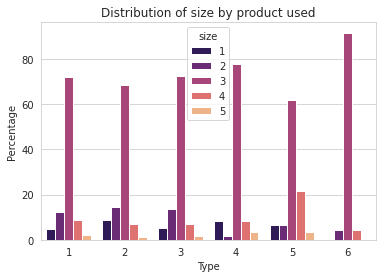

In [20]:
data = plotdata
df1 = pd.DataFrame(data)

arr =[]

## overall we have 5 possible values for M18 1,2,3,4,5. So first store the count of occurence of each of them

y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257A'])):
    y_values.append(df1['S257A'][i] * df1['M18'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1

## Store the count for S257A in arr
arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);

## Upto this point, arr will store the frequency of 1,2,3,4,5 in S257A


## similarly we will store the frequency for all the columns.

#2nd 
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257B'])):
    y_values.append(df1['S257B'][i] * df1['M18'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1

arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);

#3rd
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257C'])):
    y_values.append(df1['S257C'][i] * df1['M18'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1

arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);

#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257D'])):
    y_values.append(df1['S257D'][i] * df1['M18'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1

arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);

#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257E'])):
    y_values.append(df1['S257E'][i] * df1['M18'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1

arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);

#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257X'])):
    y_values.append(df1['S257X'][i] * df1['M18'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1

arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);

## In the end we will have an array of size 30 thats storing the count of 1,2,3,4,5 in all the columns 


## after that its standard procedure to create a bar chart
arr_t =[]
arr_s=[]
for i in range(1,7):
  for j in range(1,6):
    arr_t.append(str(i))

for i in range(1,7):
  for j in range(1,6):
    arr_s.append(str(j))

# arr_s
data = pd.DataFrame({'type':arr_t,'size':arr_s,'count':arr
                      })
# calculate percentages
data['percent'] = data['count'] / data.groupby('type')['count'].transform('sum') * 100

# create stacked bar chart
sns.set_style('whitegrid')
sns.barplot(x='type', y='percent', hue='size', data=data, palette='magma')
plt.title('Distribution of size by product used')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.show()

#size and product

Boxplot of the distribution of birth size and product used:

<Axes: >

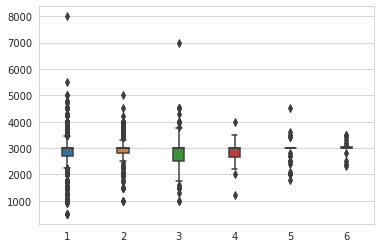

In [22]:
data = plotdata
df = pd.DataFrame(data)

y_values = []
for i in range(len(df['S257A'])):
    if df['S257A'][i]==1:
      y_values.append(df['M19'][i])

y_values1 = []
for i in range(len(df['S257B'])):
    if df['S257B'][i]==1:
      y_values1.append(df['M19'][i])

y_values2 = []
for i in range(len(df['S257C'])):
    if df['S257C'][i]==1:
      y_values2.append(df['M19'][i])

y_values3 = []
for i in range(len(df['S257D'])):
    if df['S257D'][i]==1:
      y_values3.append(df['M19'][i])

y_values4 = []
for i in range(len(df['S257E'])):
    if df['S257E'][i]==1:
      y_values4.append(df['M19'][i])

y_values5 = []
for i in range(len(df['S257X'])):
    if df['S257X'][i]==1:
      y_values5.append(df['M19'][i])    

NA = [73, 49, 53, 20, 20, 20, 20, 20, 20, 20, 20, 20]
HG = [73, 30, 60]

df = pd.Series(y_values, name="1").to_frame().join(pd.Series(y_values1, name="2").to_frame().join(pd.Series(y_values2, name="3").to_frame().join(pd.Series(y_values3, name="4").to_frame().join(pd.Series(y_values4, name="5").to_frame().join(pd.Series(y_values5, name="6"))))))
sns.boxplot(data=df, width = 0.2) 

#size and product box plot


### Termination in Pregancy and Complication in Abortion

In [25]:
df1 = pd.read_csv('/content/terminated_preg.csv', low_memory=False)
# using abortion data for the next set of graphs

Plot of the product used and the percentage distrubution of which month the pregnancy terminated was:

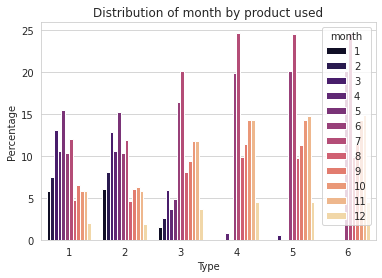

In [24]:
data = df1
df1 = pd.DataFrame(data)

## Similar to the approach used in the bar chart above

arr =[]

y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
cnt6=0
cnt7=0
cnt8=0
cnt9=0
cnt10=0
cnt11=0
cnt12=0

for i in range(len(df1['S257A'])):
    y_values.append(df1['S257A'][i] * df1['V229'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1
    if(y_values[i]==6):
      cnt6+=1
    if(y_values[i]==7):
      cnt7+=1
    if(y_values[i]==8):
      cnt8+=1
    if(y_values[i]==9):
      cnt9+=1
    if(y_values[i]==10):
      cnt10+=1
    if(y_values[i]==11):
      cnt11+=1
    if(y_values[i]==12):
      cnt12+=1
arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);
arr.append(cnt6);
arr.append(cnt7);
arr.append(cnt8);
arr.append(cnt9);
arr.append(cnt10);
arr.append(cnt11);
arr.append(cnt12);
#2nd 

for i in range(len(df1['S257B'])):
    y_values.append(df1['S257B'][i] * df1['V229'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1
    if(y_values[i]==6):
      cnt6+=1
    if(y_values[i]==7):
      cnt7+=1
    if(y_values[i]==8):
      cnt8+=1
    if(y_values[i]==9):
      cnt9+=1
    if(y_values[i]==10):
      cnt10+=1
    if(y_values[i]==11):
      cnt11+=1
    if(y_values[i]==12):
      cnt12+=1


arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);
arr.append(cnt6);
arr.append(cnt7);
arr.append(cnt8);
arr.append(cnt9);
arr.append(cnt10);
arr.append(cnt11);
arr.append(cnt12);

#3rd
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257C'])):
    y_values.append(df1['S257C'][i] * df1['V229'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1
    if(y_values[i]==6):
      cnt6+=1
    if(y_values[i]==7):
      cnt7+=1
    if(y_values[i]==8):
      cnt8+=1
    if(y_values[i]==9):
      cnt9+=1
    if(y_values[i]==10):
      cnt10+=1
    if(y_values[i]==11):
      cnt11+=1
    if(y_values[i]==12):
      cnt12+=1

arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);
arr.append(cnt6);
arr.append(cnt7);
arr.append(cnt8);
arr.append(cnt9);
arr.append(cnt10);
arr.append(cnt11);
arr.append(cnt12);

#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257D'])):
    y_values.append(df1['S257D'][i] * df1['V229'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1
    if(y_values[i]==6):
      cnt6+=1
    if(y_values[i]==7):
      cnt7+=1
    if(y_values[i]==8):
      cnt8+=1
    if(y_values[i]==9):
      cnt9+=1
    if(y_values[i]==10):
      cnt10+=1
    if(y_values[i]==11):
      cnt11+=1
    if(y_values[i]==12):
      cnt12+=1
arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);
arr.append(cnt6);
arr.append(cnt7);
arr.append(cnt8);
arr.append(cnt9);
arr.append(cnt10);
arr.append(cnt11);
arr.append(cnt12);

#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257E'])):
    y_values.append(df1['S257E'][i] * df1['V229'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1
    if(y_values[i]==6):
      cnt6+=1
    if(y_values[i]==7):
      cnt7+=1
    if(y_values[i]==8):
      cnt8+=1
    if(y_values[i]==9):
      cnt9+=1
    if(y_values[i]==10):
      cnt10+=1
    if(y_values[i]==11):
      cnt11+=1
    if(y_values[i]==12):
      cnt12+=1
arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);
arr.append(cnt6);
arr.append(cnt7);
arr.append(cnt8);
arr.append(cnt9);
arr.append(cnt10);
arr.append(cnt11);
arr.append(cnt12);
#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257X'])):
    y_values.append(df1['S257X'][i] * df1['V229'][i])

for i in range(len(y_values)):
    if(y_values[i]==1):
      cnt1+=1
    if(y_values[i]==2):
      cnt2+=1
    if(y_values[i]==3):
      cnt3+=1
    if(y_values[i]==4):
      cnt4+=1
    if(y_values[i]==5):
      cnt5+=1
    if(y_values[i]==6):
      cnt6+=1
    if(y_values[i]==7):
      cnt7+=1
    if(y_values[i]==8):
      cnt8+=1
    if(y_values[i]==9):
      cnt9+=1
    if(y_values[i]==10):
      cnt10+=1
    if(y_values[i]==11):
      cnt11+=1
    if(y_values[i]==12):
      cnt12+=1
arr.append(cnt1);
arr.append(cnt2);
arr.append(cnt3);
arr.append(cnt4);
arr.append(cnt5);
arr.append(cnt6);
arr.append(cnt7);
arr.append(cnt8);
arr.append(cnt9);
arr.append(cnt10);
arr.append(cnt11);
arr.append(cnt12);


arr_t =[]
arr_s=[]
for i in range(1,7):
  for j in range(1,13):
    arr_t.append(str(i))

for i in range(1,7):
  for j in range(1,13):
    arr_s.append(str(j))

# len(arr)
# arr

data = pd.DataFrame({'type':arr_t,'month':arr_s,'count':arr
                      })
# calculate percentages
data['percent'] = data['count'] / data.groupby('type')['count'].transform('sum') * 100

# create stacked bar chart
sns.set_style('whitegrid')
sns.barplot(x='type', y='percent', hue='month', data=data, palette='magma')
plt.title('Distribution of month by product used')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.show()

#prod and preg terminated


In [26]:
df2 = pd.read_csv('/content/abortion_complication.csv')
# using abortion data for the next set of graphs

Plot of the product used and distribution of whether or not there was a complication in pregnancy:

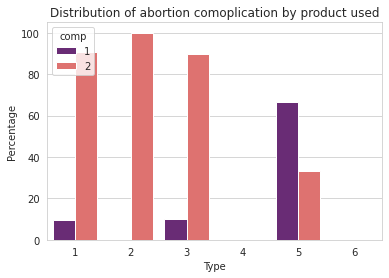

In [27]:
data = df2
df1 = pd.DataFrame(data)

## another stacked bar chart 

arr =[]

y_values = []
cnt1=0
cnt2=0

for i in range(len(df1['S257A'])):
    if df1['S257A'][i]==1:
      if df1['S240'][i]==1:
        cnt1+=1
      else:
        cnt2+=1

arr.append(cnt1);
arr.append(cnt2);

#2nd 
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257B'])):
    if df1['S257B'][i]==1:
      if df1['S240'][i]==1:
        cnt1+=1
      else:
        cnt2+=1

arr.append(cnt1);
arr.append(cnt2);

#3rd
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257C'])):
    if df1['S257C'][i]==1:
      if df1['S240'][i]==1:
        cnt1+=1
      else:
        cnt2+=1

arr.append(cnt1);
arr.append(cnt2);

#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257D'])):
    if df1['S257D'][i]==1:
      if df1['S240'][i]==1:
        cnt1+=1
      else:
        cnt2+=1

arr.append(cnt1);
arr.append(cnt2);

#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257E'])):
    if df1['S257E'][i]==1:
      if df1['S240'][i]==1:
        cnt1+=1
      else:
        cnt2+=1

arr.append(cnt1);
arr.append(cnt2);
#
y_values = []
cnt1=0
cnt2=0
cnt3=0
cnt4=0
cnt5=0
for i in range(len(df1['S257X'])):
    if df1['S257X'][i]==1:
      if df1['S240'][i]==1:
        cnt1+=1
      else:
        cnt2+=1

arr.append(cnt1);
arr.append(cnt2);



arr_t =[]
arr_s=[]
for i in range(1,7):
  for j in range(1,3):
    arr_t.append(str(i))

for i in range(1,7):
  for j in range(1,3):
    arr_s.append(str(j))

# arr_s
data = pd.DataFrame({'type':arr_t,'comp':arr_s,'count':arr
                      })
# calculate percentages
data['percent'] = data['count'] / data.groupby('type')['count'].transform('sum') * 100

# create stacked bar chart
sns.set_style('whitegrid')
sns.barplot(x='type', y='percent', hue='comp', data=data, palette='magma')
plt.title('Distribution of abortion comoplication by product used')
plt.xlabel('Type')
plt.ylabel('Percentage')
plt.show()

#product and complication